### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Data Collection and Data Analysis

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.shape

(301, 9)

In [7]:
df.Car_Name.value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


<Axes: xlabel='Seller_Type', ylabel='count'>

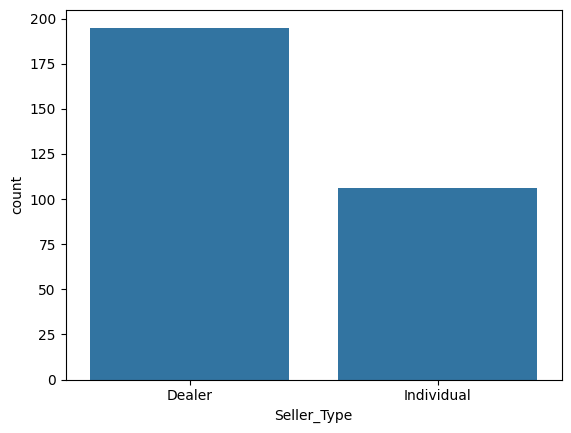

In [10]:
sns.countplot(x="Seller_Type", data=df)

<Axes: xlabel='Transmission', ylabel='count'>

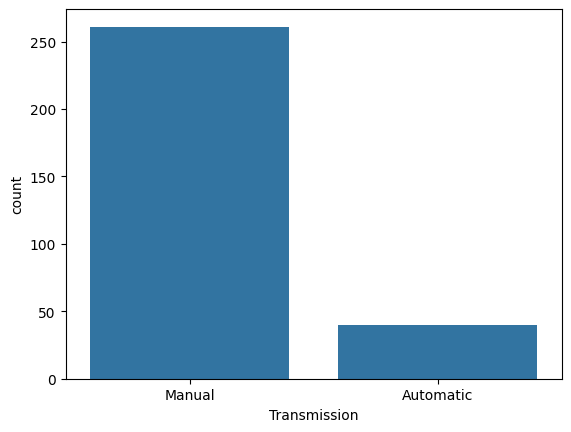

In [11]:
sns.countplot(x="Transmission", data=df)

<Axes: xlabel='Fuel_Type', ylabel='count'>

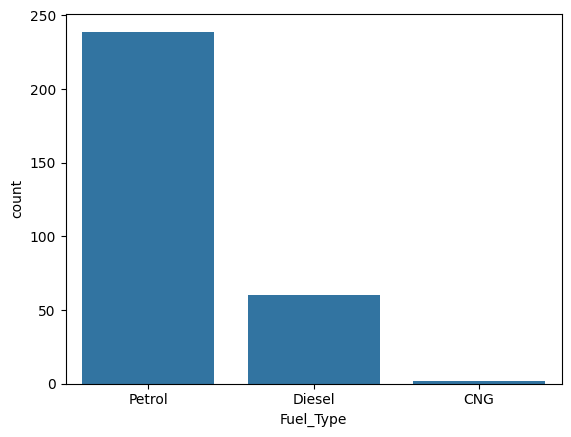

In [12]:
sns.countplot(x="Fuel_Type", data=df)

### Encoding Categorical Data

In [18]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
df['Transmission'] = df['Transmission'].map({'Manual':0, 'Automatic':1})
df['Seller_Type'] = df['Seller_Type'].map({'Individual':0, 'Dealer':1})

In [19]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,1,0,0
297,brio,2015,4.00,5.90,60000,0,1,0,0
298,city,2009,3.35,11.00,87934,0,1,0,0
299,city,2017,11.50,12.50,9000,1,1,0,0


# Seperating Features and Target

In [20]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

<Axes: >

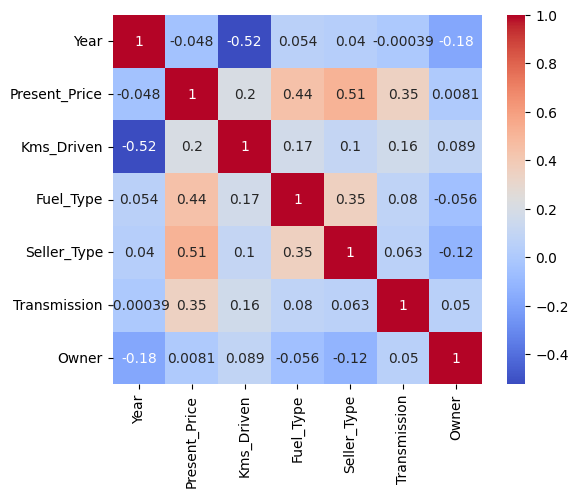

In [25]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True, annot_kws=None )

### Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


### Model Training

In [37]:
models = {"Linear Regression": LinearRegression(), "Lasso Regression": Lasso()}
for label, model in models.items():
  model.fit(X_train, y_train)
  training_pred = model.predict(X_train)
  training_r2_score = r2_score(y_train, training_pred)
  training_mse = mean_squared_error(y_train, training_pred)
  print(f"R2 Score: of {label} is: ", training_r2_score)
  print(f"MSE of {label} is: ", training_mse)

R2 Score: of Linear Regression is:  0.8806173715719132
MSE of Linear Regression is:  3.2107996873118663
R2 Score: of Lasso Regression is:  0.8436909482009372
MSE of Lasso Regression is:  4.2039370488710945


In [39]:
for label, model in models.items():
  y_pred = model.predict(X_test)
  test_r2_score = r2_score(y_test, y_pred)
  test_mse = mean_squared_error(y_test, y_pred)
  print(f"Test R2 Score of {label}: ", test_r2_score)
  print(f"Test MSE: of {label}", test_mse)

Test R2 Score of Linear Regression:  0.8311069476244142
Test MSE: of Linear Regression 2.518926308345812
Test R2 Score of Lasso Regression:  0.839226320049874
Test MSE: of Lasso Regression 2.397831328285492


Lasso regression Performs slightly better on unseen data. So, we will select lasso regression for predictive model.

In [40]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [41]:
input_data = [2014,5.59,27000,0,1,0,0]
array = np.asarray(input_data)
reshape = array.reshape(1, -1)
prediction = model.predict(reshape)
print("The price of car is estimated to be: " , round(prediction[0]*100000, 2))

The price of car is estimated to be:  383112.73


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [42]:
import joblib

In [43]:
joblib.dump(model, "lasso_model.pkl")

['lasso_model.pkl']